In [60]:
# import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi = 100)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [61]:
network_data_file = 'Random Network.csv'

# read in data
network_df = pd.read_csv("Data/" + network_data_file)

# replace all nan values with empty strings
network_df = network_df.fillna('')

# convert all columns of the dataframe to string type expect for nan values
network_df = network_df.astype(str)

# print first 5 rows
network_df.head()

,Page,Links To
0,0,
1,1,19;7;18;9;2;5;16;4;13;3;8;17
2,2,19;5;1;12;9;16;13;17;8;15;6;3
3,3,6;7;16;15;9;10;13;12;18;5;2
4,4,15;16;14;5;6;0;8;4;2;19;18;17


In [62]:
# convert the read in network dataframe into an adjacency list

# create an empty dictionary
adjacency_list = {}

# loop through the dataframe
for index, row in network_df.iterrows():
    # get the source and target nodes
    page = row['Page']
    links = row['Links To']

    # split links into a list by ";"
    links = links.split(';')
    
    adjacency_list[page] = links

# print the adjacency list
adjacency_list

{'0': [''],
 '1': ['19', '7', '18', '9', '2', '5', '16', '4', '13', '3', '8', '17'],
 '2': ['19', '5', '1', '12', '9', '16', '13', '17', '8', '15', '6', '3'],
 '3': ['6', '7', '16', '15', '9', '10', '13', '12', '18', '5', '2'],
 '4': ['15', '16', '14', '5', '6', '0', '8', '4', '2', '19', '18', '17'],
 '5': ['9', '16', '12', '10', '1', '5', '7', '18', '4', '6'],
 '6': ['11', '12', '13', '10', '4', '14'],
 '7': ['6', '4', '2', '0', '18', '14', '11', '1', '12', '7', '3', '15'],
 '8': ['9', '17', '19', '4', '12', '13', '5', '8', '14', '2', '18'],
 '9': ['11', '4', '6', '7', '1', '2', '14'],
 '10': ['16', '6', '15', '19', '8', '7', '0', '12', '17', '3', '13'],
 '11': ['10', '17', '5', '15', '1', '6', '9'],
 '12': ['6', '17', '12', '14', '0', '10', '7', '19', '2', '5', '11'],
 '13': ['7', '4', '1', '17', '14', '15', '0', '2', '8'],
 '14': ['19', '0', '1', '9', '14', '18'],
 '15': ['10', '8', '1', '15', '18', '4', '17', '13', '0', '6'],
 '16': ['10', '13', '16', '15', '12', '4'],
 '17': ['6',

In [63]:
# create a new dictionary to store the pagerank values of all the pages
pagerank = {}

# prefill the dictionary with 1.0 for all the pages
for page in adjacency_list:
    pagerank[page] = 1.0

# print the pagerank dictionary
pagerank

{'0': 1.0,
 '1': 1.0,
 '2': 1.0,
 '3': 1.0,
 '4': 1.0,
 '5': 1.0,
 '6': 1.0,
 '7': 1.0,
 '8': 1.0,
 '9': 1.0,
 '10': 1.0,
 '11': 1.0,
 '12': 1.0,
 '13': 1.0,
 '14': 1.0,
 '15': 1.0,
 '16': 1.0,
 '17': 1.0,
 '18': 1.0,
 '19': 1.0}

In [64]:
# calculate the pagerank values for all the pages

# set the damping factor
damping_factor = 0.85

# set change factor
change_factor = float('inf')

# keep updating the pagerank values until the change factor is less than 0.01
while change_factor > 0.01:

    # create a copy of the current pagerank dictionary
    old_pagerank = pagerank.copy()

    # loop through each item in the pagerank dictionary
    for page in pagerank:

        raw_score = 0

        # check which pages link to the current page
        for parent in adjacency_list:

            if page in adjacency_list[parent]:
                raw_score += pagerank[parent] / len(adjacency_list[parent])


        # calculate the pagerank value for the page
        pagerank[page] = (1 - damping_factor) + damping_factor * raw_score

    # calculate the change factor from the old and new pagerank values, pick the largest change
    local_max_change_factor = 0
    for page in pagerank:
        change_factor = abs(pagerank[page] - old_pagerank[page]) / old_pagerank[page]
        if change_factor > local_max_change_factor:
            local_max_change_factor = change_factor

    # update the global change factor
    if local_max_change_factor < change_factor:
        change_factor = local_max_change_factor

# print the pagerank dictionary
pagerank

{'0': 0.8564963265199013,
 '1': 0.8925699369863187,
 '2': 0.7080214626921812,
 '3': 0.39387310892972044,
 '4': 0.9826853811855684,
 '5': 0.7652077664561693,
 '6': 0.839043260841348,
 '7': 0.6627265296761361,
 '8': 0.6813998222832882,
 '9': 0.6745070868167308,
 '10': 1.0638663662522985,
 '11': 0.4639975732730114,
 '12': 0.8497105738440047,
 '13': 0.7818975122097465,
 '14': 0.9560515627081921,
 '15': 0.793894172731089,
 '16': 0.676916568800188,
 '17': 1.0524064334270147,
 '18': 0.7496384789391015,
 '19': 0.7377548648778752}

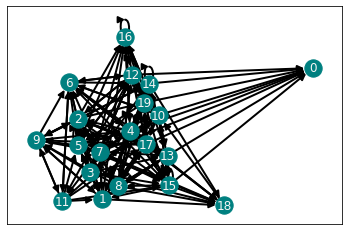

In [65]:
# initialize the networkx graph object
network_graph = nx.DiGraph()

# add vertices to the graph from the adjacency list
for page in adjacency_list:
    network_graph.add_node(page)

# add edges to the graph from the adjacency list
for page in adjacency_list:
    
    for link in adjacency_list[page]:
        if len(link) > 0:
            network_graph.add_edge(page, link)


# generate file name for the graph
graph_file_name = network_data_file.replace('.csv', '.png')

# visualize the network graph as a directed graph

# set the graph options
options = {
    'node_color': 'teal',
    'node_size': 300,
    'font_color': 'whitesmoke',
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 13,
}

# draw and export the graph
nx.draw_networkx(network_graph, with_labels=True, arrows=True, **options)
plt.savefig(graph_file_name, format="png")
